In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

# Eng translation soon!

In [46]:
# se define el path
df_train = pd.read_csv('train.csv')

In [47]:
# básico
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [48]:
# Podemos averiguar las medidas (x * y) de la distribución con:
df_train.shape  # (1460, 81)


(1460, 81)

In [49]:
# Si se quiere ver una columna determinada, ejemplo Id:
df_train['Id']  # It only shows the first and last 5 elements


0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

In [50]:
# Pandas maneja una sintaxis de diccionario, por lo que si quiero acceder a los 10 primeros elementos de Id:
df_train['Id'][:10]

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Id, dtype: int64

In [51]:
# A su vez, se pueden seleccionar más de una columna, usando doble corchetes:
df_train[['Id', 'SalePrice']]  # double brackets

,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000
...,...,...
1455,1456,175000
1456,1457,210000
1457,1458,266500
1458,1459,142125


In [52]:
# Medidas de estadística descriptiva
df_train.describe() # Count, M(x), s(x), Q1, Me(x), Q3, Min, Max for every column

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [53]:
# Para ver la medida resumen, en este caso la media aritmética, de una columna en particular:
df_train['SalePrice'].mean()

180921.19589041095

La idea del proyecto es determinar cuáles son las variables que más influyen en el precio de venta de una casa.
En este caso, se van a tener en cuenta cuatro variables que estarán divididas en dos grupos que servirán como hipótesis: \
Variables de Construcción (Cualitativa ordinal / Cuantitativa discreta) 
- **OverallQual**: Calidad general 
- **YearBuilt**: Año de construcción 

Variables de Espacio (Cuantitativas continuas) 
- **TotalBsmtSF**: Tamaño del sótano\
- **GrLivArea**: Tamaño de la casa

Al ser **SalePrice** la variable respuesta, se debe analizar como primer paso:

In [54]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

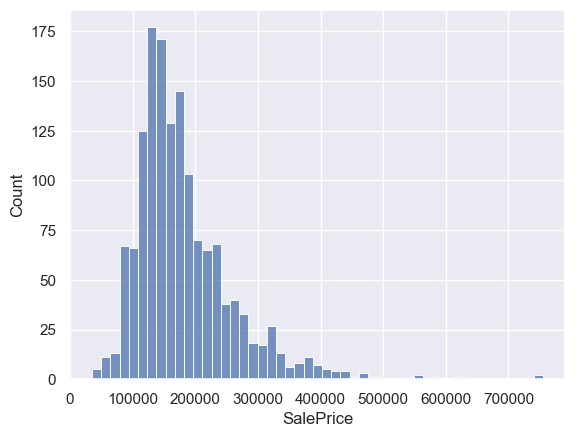

In [55]:
# Para graficarlo se utiliza el método distplot de seaborn (DEPRECATED)
sns.histplot(df_train['SalePrice'])

Como se puede ver, la distribución de la variable SalePrice es **asimétrica derecha** o positiva. Se puede predecir debido a que la media es mayor que la mediana (mean > median),es decir, la mayoría de las casas se venden por debajo de la media. \
A su vez también se puede ver que la distribución es puntiaguda o **leptocúrtica**,
lo que significa que hay una mayor concentración de los datos alrededor de la media

In [56]:
# Para ver la asimetría se utiliza el método skewness de scipy.stats
print(df_train['SalePrice'].skew()) # 1.88 > 0 -> positiva

1.8828757597682129


In [57]:
# En el caso de la kurtosis:
print(df_train['SalePrice'].kurtosis())  # 6.54 > 0 -> leptocúrtica

6.536281860064529


### Relaciones Numéricas - OverallQual y TotalBsmtSF

El objetivo es determinar si hay una relación con la variable SalePrice

In [58]:
GrLivArea = 'GrLivArea'

# Concatenamos con SalePrice para hacer una tabla aparte para realizar una tabla de scatterplot

data = pd.concat([df_train['SalePrice'], df_train[GrLivArea]],
                 axis=1)  # axis=1 para concatenar por columnas  / Usar una variable no cambió nada

data

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
...,...,...
1455,175000,1647
1456,210000,2073
1457,266500,2340
1458,142125,1078


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

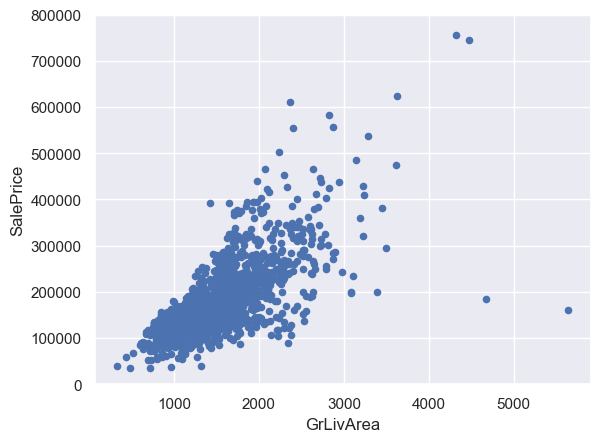

In [59]:
# Con estos datos, se puede hacer el scatterplot

# x = var. indepte. / y = var. depen. / ylim = limites del eje y
data.plot.scatter(x=GrLivArea, y='SalePrice', ylim=(0, 800000))

Se puede apreciar a simple vista que existe una relación lineal directa entre GrLivArea y SalePrice.
Asi y todo, existen algunos valores atípicos (outliers)
**A mayor espacio evitable, mayor precio de venta.**

,SalePrice,TotalBsmtSF
0,208500,856
1,181500,1262
2,223500,920
3,140000,756
4,250000,1145
...,...,...
1455,175000,953
1456,210000,1542
1457,266500,1152
1458,142125,1078


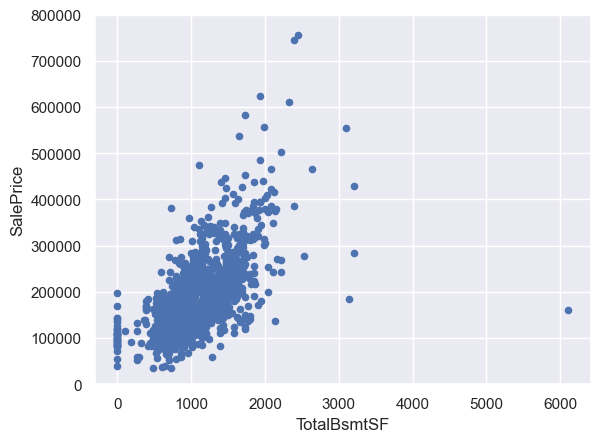

In [60]:
# Repetimos el proceso para TotalBsmtSF


TotalBsmtSF = 'TotalBsmtSF'

data_bsmt = pd.concat([df_train['SalePrice'], df_train[TotalBsmtSF]], axis=1)

data_bsmt.plot.scatter(x=TotalBsmtSF, y='SalePrice', ylim=(0, 800000))
data_bsmt

Si bien existe una **relación lineal directa**, no es tan evidente o tan fuerte como la de GrLivArea.
Al igual que la variable anterior, también existen valores atípicos.

### Variables Categóricas - Relación con OverallQual y YearBuilt

(-0.5, 9.5, 0.0, 800000.0)

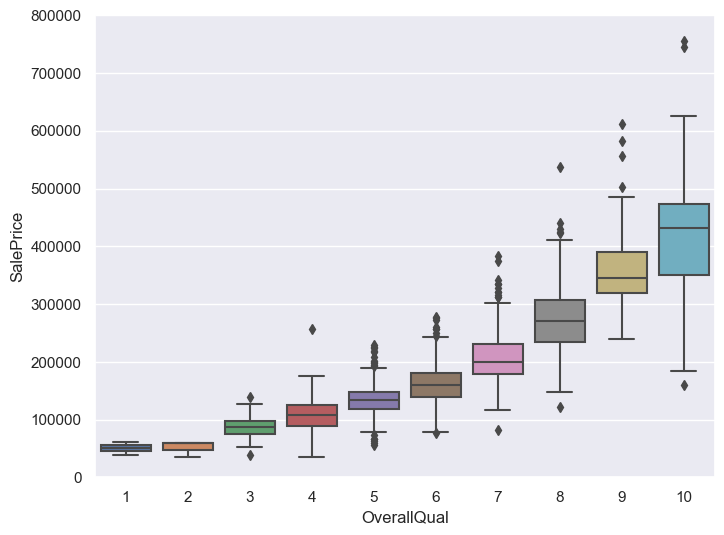

In [61]:
OverallQual = 'OverallQual'

# Para este tipo de variable se puede utilizar un diagrama de caja y brazos (boxplot)

data_qual = pd.concat([df_train['SalePrice'], df_train[OverallQual]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))  # Marco
fig = sns.boxplot(x=OverallQual, y='SalePrice', data=data_qual)
fig.axis(ymin=0, ymax=800000)

Se confirma la relación **lineal directa**. \
Existe una mayor dispersión relativa en los precios de las casas que tienen **OverallQual** más alta
debido a que el recorrido intercuartil es mayor que el resto (tamaño de las cajas), de hecho hay
casas del decil 10 que tienen un precio más bajo que una de decil 9. A su vez
parece haber una tendencia de que los valores atípicos por encima del límite superior interno
son más comunes que los que están por debajo del límite inferior interno. \
Elementos a considerar:
- Cuando **OverallQual** == 5, la cantidad de ocurrencias atípicas es máxima, tanto para abajo como
para arriba.
- El 25% de las casas más baratas del decil 10, vale lo mismo (aproximadamente) o menos que el 50%
de las casas más baratas del decil 9.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

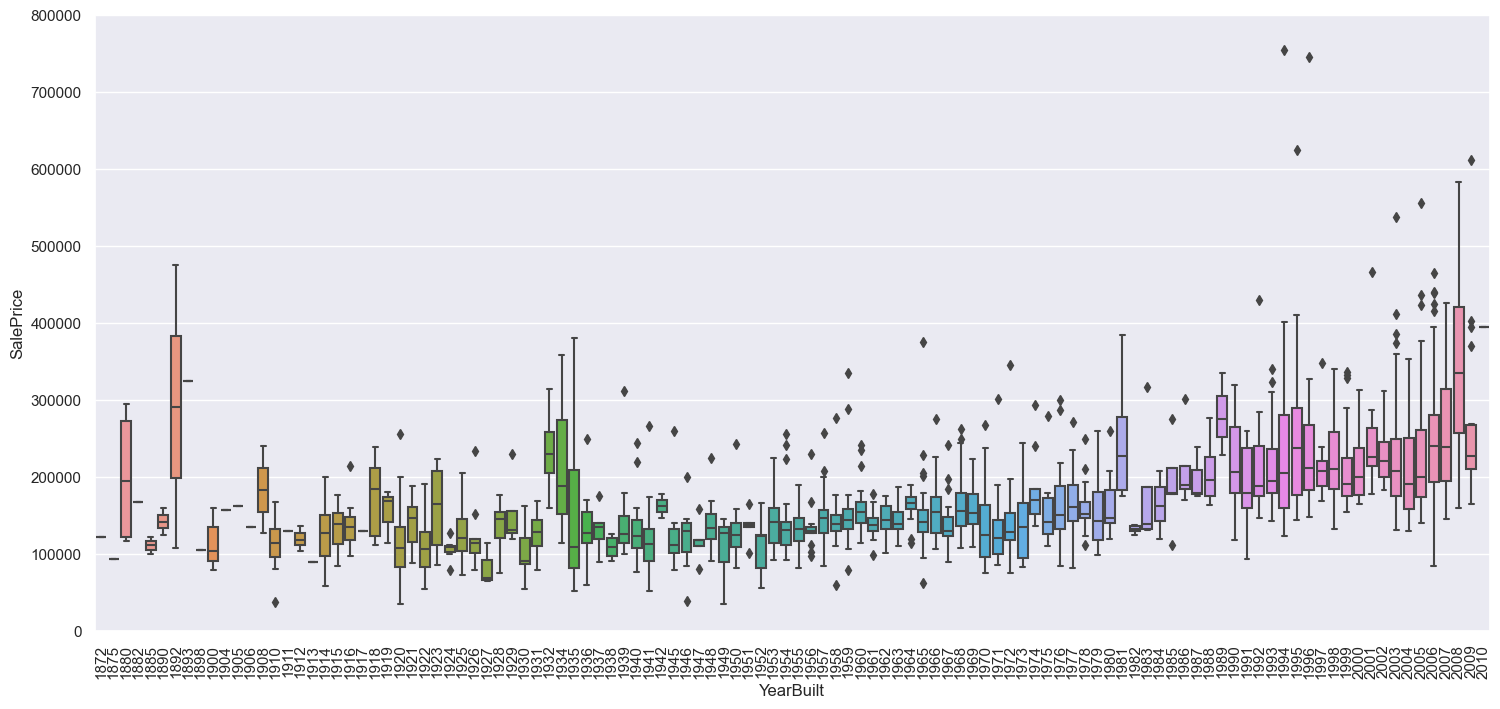

In [62]:
# En el caso de YearBuilt

YearBuilt = 'YearBuilt'

data_year = pd.concat([df_train['SalePrice'], df_train[YearBuilt]], axis=1)
f, ax = plt.subplots(figsize=(18, 8))
fig = sns.boxplot(x=YearBuilt, y='SalePrice', data=data_year)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)  # Para que años se vean en vertical

No se puede evidenciar una asociación lineal muy fuerte puesto que hay
casas muy viejas (antigüedades) que se venden al precio de una propiedad
más actual. Si acotamos la distribución podemos decir que en los últimos
veinte años existen muchísimos más outliers que en los demás, asumiendo
que la variable precio está más dispersa en estos valores.

## Conclusiones

Basándonos en este simple análisis, podemos afirmar que: 

**Variables Numéricas**:
- Precio de venta ('**SalePrice**') se relaciona muchísimo con Superficie Total (**GrLiveArea**)
de forma lineal directa, al igual que con Superficie del Sótano (**TotalBsmtSF**) pero esta última
con menor intensidad.

**Variables Categóricas**:
- Conforme a la Calidad (**OverallQual**) resulta mucho más ponderante a la hora de decidir
un precio de venta (**SalePrice**) que al año de construcción del inmueble (**YearBuilt**) debido
a la asociación lineal más fuerte de la primera.

<Axes: >

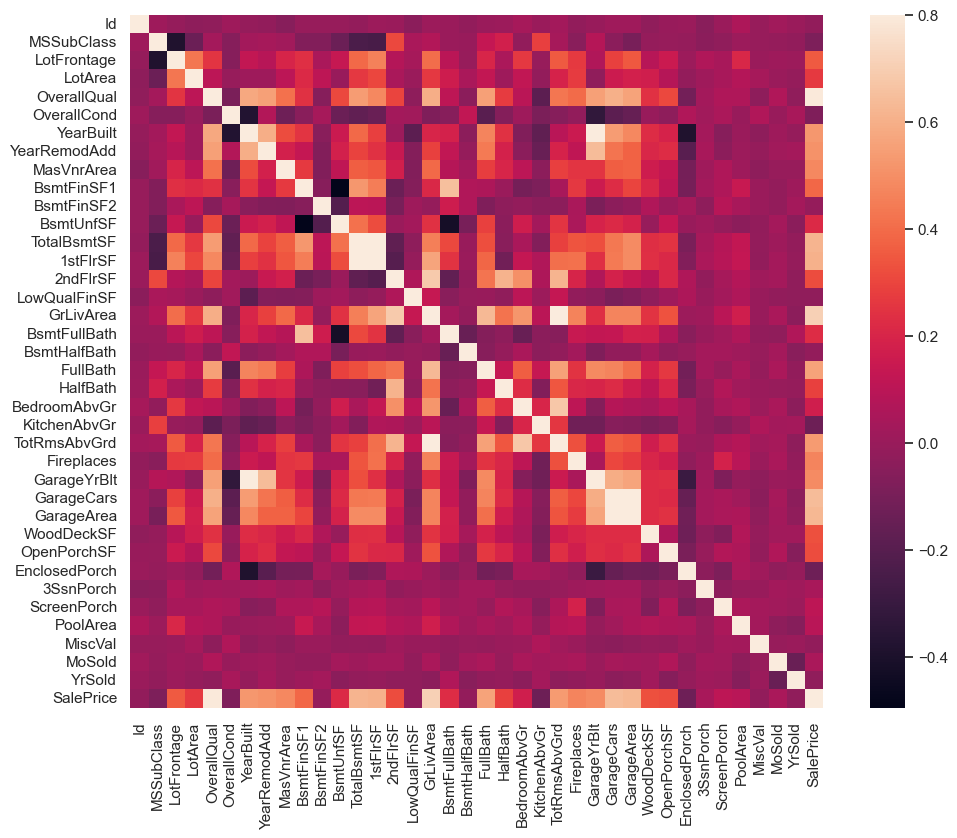

In [63]:
# Para confirmar la hipótesis, procedemos a realizar una matriz de correlación
# Tal que g1 = [[sum(xi-mx)^3]/n]/s^3 ó P = (mx - mo)/s -> P 3(mx - mex)/s

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df_train.corr(numeric_only=True), vmax=.8, square=True) #numeric_only=True since pandas 2.0.0


Llegamos a la conclusión, según la matriz de correlación que
La variable más fuertemente relacionada es OverallQual,
seguido de GrLiveArea y aquellas derivadas del Garage.
- Para ver los r^2:

In [64]:
GarageArea = 'GarageArea'
GarageCars = 'GarageCars'

print(f"r2 GrLivArea:", round(df_train.corr(
    numeric_only=True)['SalePrice'][GrLivArea], 4))
print(f"r2 OverallQual:", round(df_train.corr(
    numeric_only=True)['SalePrice'][OverallQual], 4))
print(f"r2 GarageArea:", round(df_train.corr(
    numeric_only=True)['SalePrice'][GarageArea], 4))
print(f"r2 GarageCars:", round(df_train.corr(
    numeric_only=True)['SalePrice'][GarageCars], 4))

r2 GrLivArea: 0.7086
r2 OverallQual: 0.791
r2 GarageArea: 0.6234
r2 GarageCars: 0.6404


Respecto a las variables analizadas, **TotalBsmtSF** Y **YearBuilt**:

In [65]:
print(f"r2 TotalBsmtSF: ", round(df_train.corr(
    numeric_only=True)['SalePrice'][TotalBsmtSF], 4))
print(f"r2 YearBuilt:", round(df_train.corr(
    numeric_only=True)['SalePrice'][YearBuilt], 4))

r2 TotalBsmtSF:  0.6136
r2 YearBuilt: 0.5229


Para lo cual se puede asumir una correlación cierta, pero con **menor**
intensidad que las variables antes mencionadas.

##  Matriz de correlación con números

Se van a seleccionar las 10 variables con un r2 más alto para asimilar
las conclusiones.

In [66]:
corrmat = df_train.corr(numeric_only=True)
k = 10
cols = df_train.corr(numeric_only=True).nlargest(k, 'SalePrice')[
    'SalePrice'].index  # k variables con más r2 de SalePrice
print(cols)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


Siendo estas las **k** columnas (10 en este ejercicio) que más correlación tienen con **SalePrice**

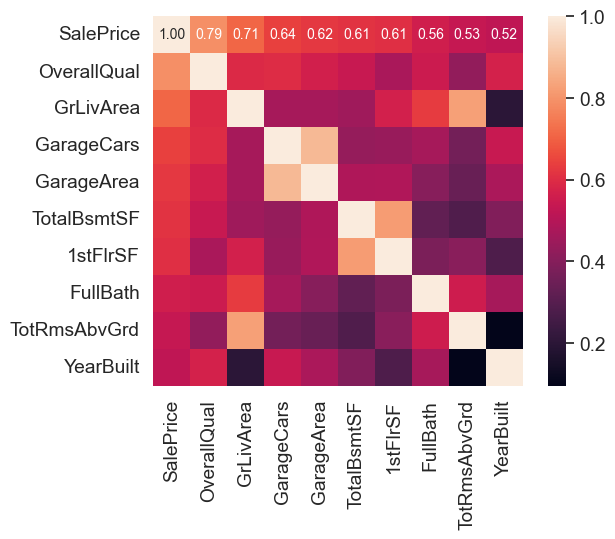

In [67]:
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

- **OverallQual**, **GrLiveArea** y **TotalBsmtSF** están fuertemente correlaciondas entre sí.
- Lógicamente las variables derivadas del Garage están correlacionadas entre sí
(**colinealidad**, no podés cambiar una sin cambiar la otra), pero
también entre sí con 'SalePrice'
- **1stFlrSF** (Superficie Primer Piso) y **TotalBsmSF** van de la mano
- De las variables tomadas como Hipótesis, la que menos relación tiene con **SalePrice**
es **YearBuilt**.

## Scatterplots entre SalePrice y variables correlacionadas

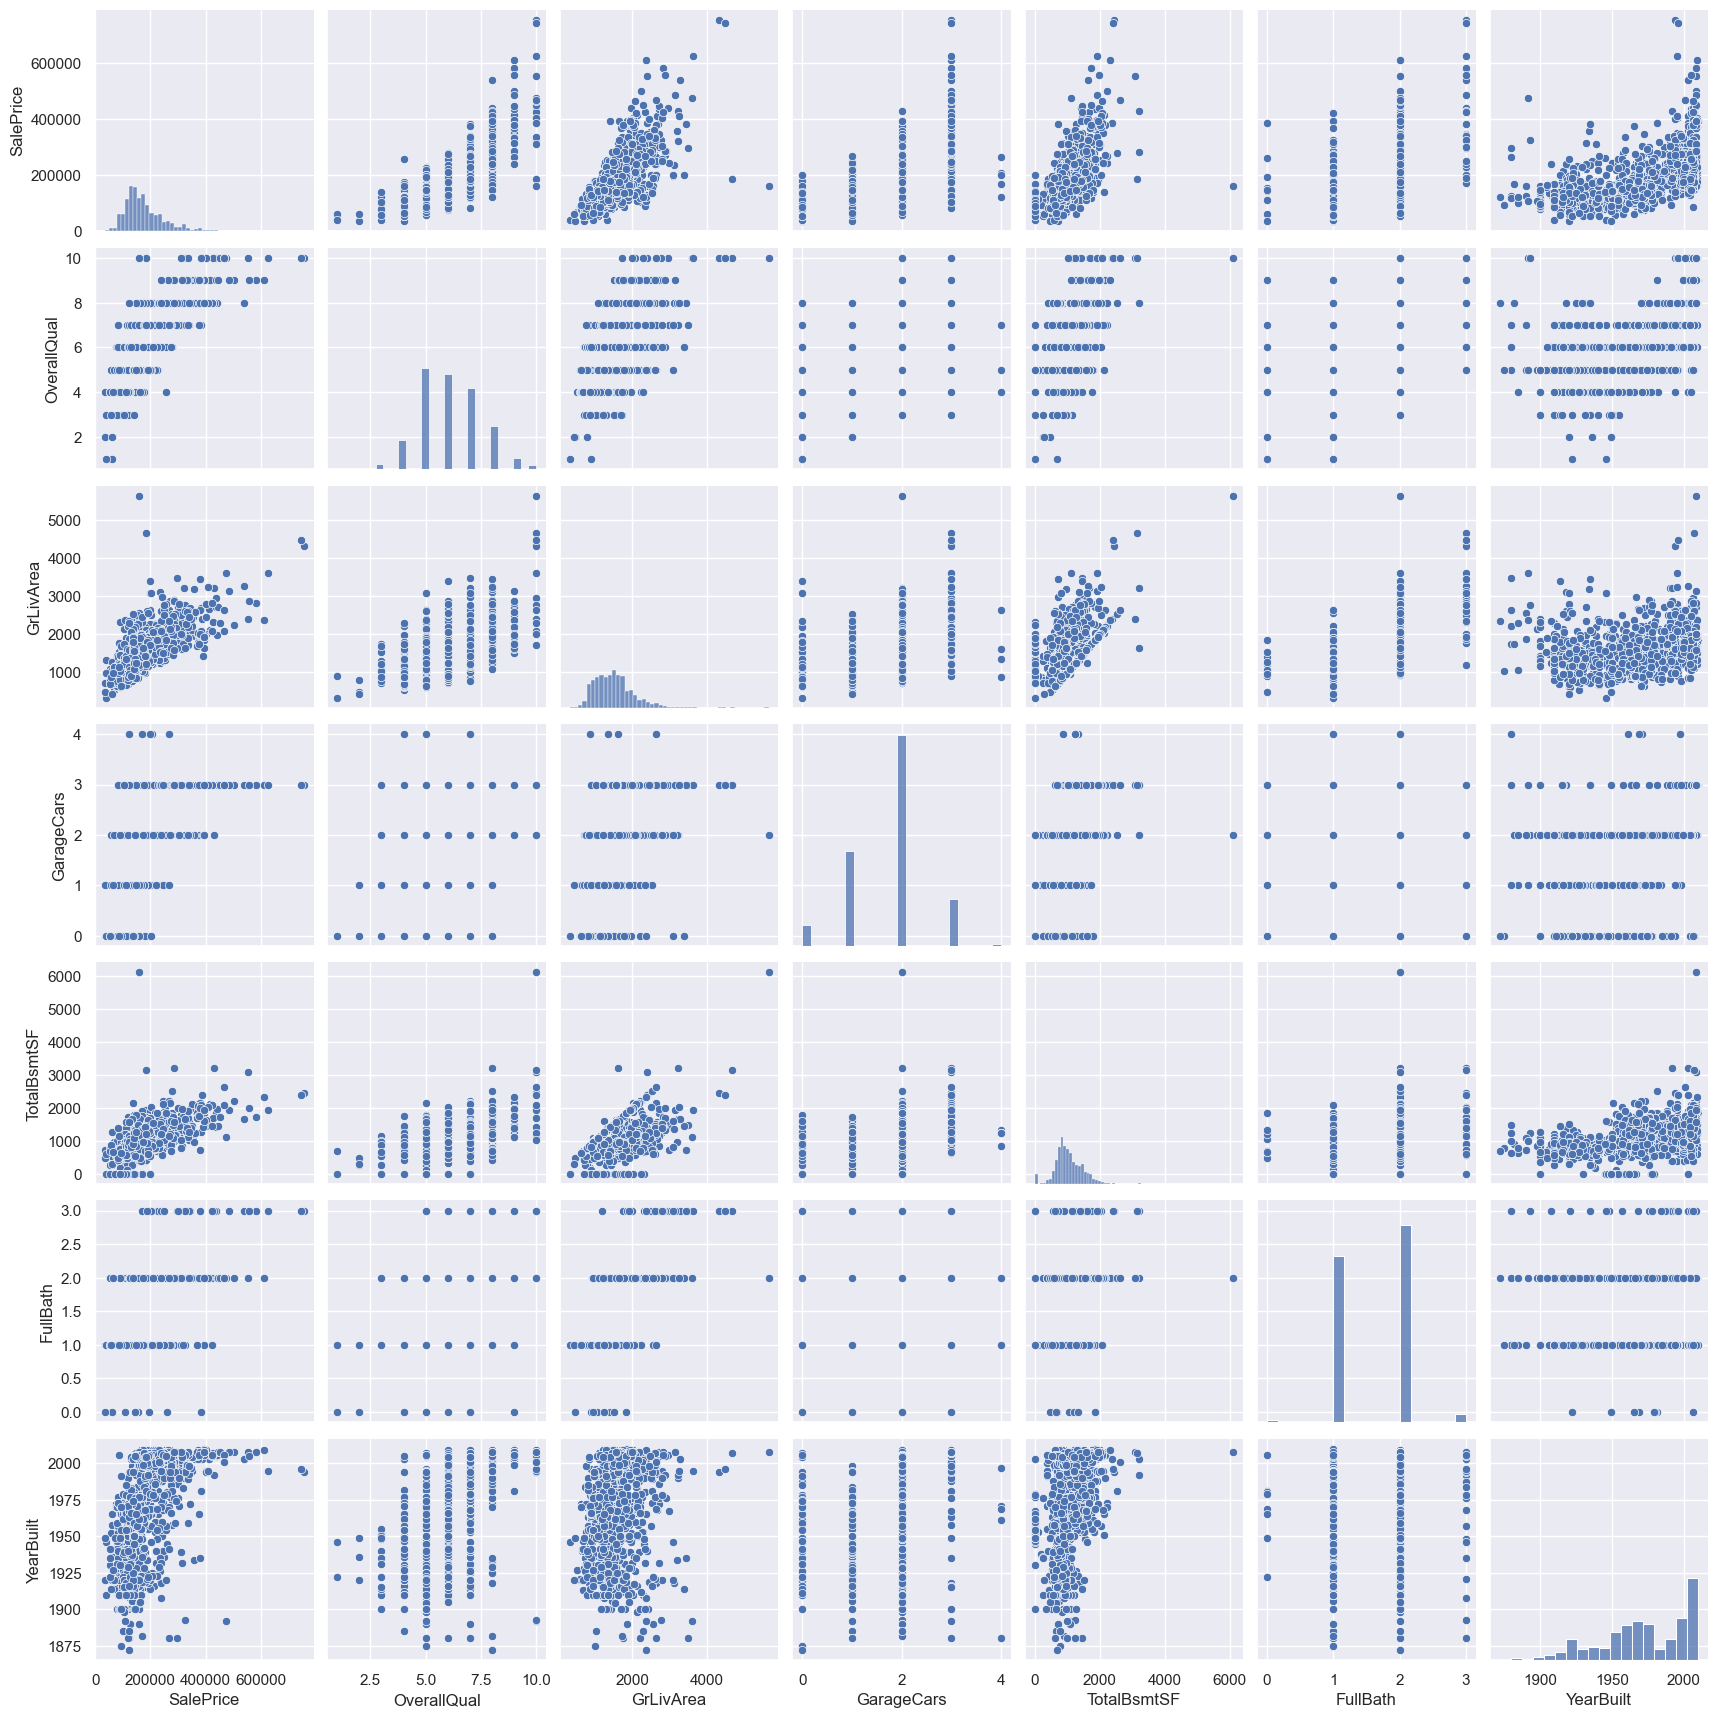

In [68]:
sns.set()

cols = ['SalePrice', 'OverallQual', 'GrLivArea',
        'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

sns.pairplot(df_train[cols], height=2.5)  # Gráfica de pares o bidimensional


## Datos Faltantes

Preguntas importantes referidas a los datos faltantes:
- Qué tan importantes son en el análisis
- Son aleatorios o tienen un patrón

Las respuestas son importantes a niveles prácticos, debido a que la faltante de datos puede causar que la muestra se achique (y perder inferencia) o que, de estar ahí, haga que pierda credibilidad.

Tratamiento simple en este ejercicio, en donde debemos asegurarnos de que los datos que faltan no tengan un sesgo o escondan 'algo más'.

In [69]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


En la columna de arriba se muestran las 20 variables que más datos faltantes tienen. A efectos prácticos, nuestro criterio será que de sobrepasar un 15% este faltante, la variable entera se eliminará y no será tenida en cuenta para el resto de los análisis. \
- Teniendo esto en cuenta, hay algunas candidatas a ser borradas (ej. PoolQC, MiscFeature). Pero primero se debe analizar si hacerlo afectaría a las demás variables. \
'Ninguna de estas variables parece importante' afirma Marcelino. Se refiere a que las variables son supérfluas a la hora de determinar el precio de un inmueble, e incluso se pregunta si esa es la razón por la que falta.
- En los casos de 'Garage**X**' y 'Bsmt**X**', ambas variables tienen la misma cantidad de datos faltantes, aludiendo que el dataset se refiere a que son las mismas observaciones. Marcelino establece que como la mayoría de la información está expresada en la variable '**GarageCars**' y considerando que sólo el 5% de datos no están, las variables dependientes del Garage pueden no ser tenidas en cuenta. \
La misma lógica aplica para el Sótano. 
- En lo que respecta '**MasVnrArea**' y '**MasVnrType**', consideraremos a estas variables no esenciales. Además, están estrechamente relacionadas con **YearBuilt** y **OverallQual**, por lo que no aportan información nueva y relevante.
- Por último, sólo faltan datos en una observación de la variable '**Electrical**'. Al ser una sola, deberíamos eliminar dicha observación para proceder con el análisis.

In [70]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, axis=1) # se borran las columnas con más de un dato faltante
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index) # se borra la observación de Electrical que faltan datos
df_train.isnull().sum().max() # cantidad de datos nulos

0

## Outliers

Los outliers o valores atípicos pueden afectar nuestros modelos y, por ende, nuestras predicciones. Además suelen ser una buena fuente de información sobre determinados comportamientos.
En este ejercicio sólo se hará un análisis rápido.

## Análisis Univariado

El principal desafío es establecer un criterio que defina a la observación como un outlier. Para esto, primero se deben estandarizar los datos para que M(x) = 0 y s = 0

In [76]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'].to_numpy()[:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('Valores fuera del límite inferior (Q1-1.5RI):')
print(low_range)
print('\nValores fuera del límite superior (Q3+1.5RI):')
print(high_range)

Valores fuera del límite inferior (Q1-1.5RI):
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

Valores fuera del límite superior (Q3+1.5RI):
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


Teniendo esta nueva información en cuenta:
- Los valores atípicos por debajo del límite inferior no están tan lejos del 0 (M(x))
- En cambio, los valores por encima del límite inferior están mucho más lejos de la media aritmética, particularmente los 2 más lejanos (7.10 y 7.22)

Marcelino afirma que, por ahora, esos valores no serán tenidos en cuenta como outliers, pero al trabajar con ellos se debe ser cuidadoso.

## Análisis Multivariado

Volviendo a los scatterplots, se pueden sacar nuevas conclusiones teniendo más información.

## Análisis Multivariado: GrLivArea y SalePrice

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

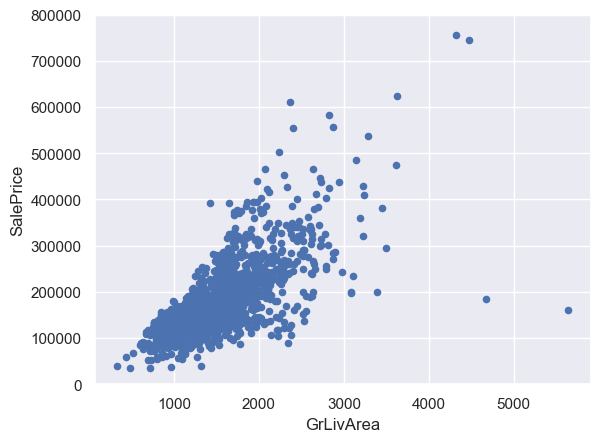

In [77]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

Qué se puede saber:
- Los dos mayores valores de la variable '**GrLivArea**' no siguen la tendencia de las demás observaciones. Marcelino aclara que esto puede ser a que se encuentren en una zona rural y ello pueda significar su bajo precio, pero está claro que no son representativas de un caso típico, por ende se los clasificará como **outliers** y se eliminarán del análisis.
- Referidos a los dos mayores valores de **SalePrice**, esos son los valores cuyo valor estandarizado daba 7.10 y 7.22, y que se debía tener cuidado. Si bien son un caso especial, al seguir la tendencia de las demás observaciones, mantenerlos en el análisis puede considerarse válido.

En la siguiente celda se encuentra el código que lista los 2 valores con mayor GrLivArea, los cuales van a ser borrados y su explicación se detalla en el primer punto de esta celda.

In [78]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [91]:
# se borran las dos observaciones con mayor GrLivArea
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index) # se borra la observación que tiene el id 1299
df_train = df_train.drop(df_train[df_train['Id'] == 524].index) # lo mismo con la id 524

## Análisis Multivariado: TotalBsmtSF y SalePrice

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

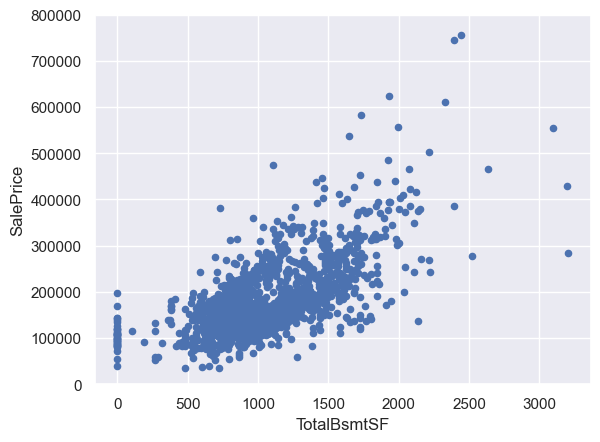

In [92]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000)) # es el mismo cuadro de antes

En este caso se pueden eliminar tranquilamente aquellos valores de TotalBsmtSF > 3000, aunque no es necesariamente obligatorio.